<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

 <p align="center">Análisis de Datos</p>


<p align="center"> Grupo: 91 </p>

 <p align="center"> Tarea 5 
Proyecto Análisis de Datos </p>

 <p align="center">  Presentado por:Pedro Daniel Ospina Ariaes</p>

<p align="center"> Código: 1007415324</p>

 <p align="center">  Tutora: Sandra M. Patiño</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> Noviembre 26 de 2024</p>
c

# Regresión Logistica Titanic

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [359]:
import pandas as pd # Manejo y analisis de estructuras de datos
import numpy as np # Calculo numerico y el analisis de datos
import seaborn as sns # Creaciòn graficos estadisticos
import matplotlib.pyplot as plt # Creaciòn de graficos en dos dimensiones

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [361]:
# Lectura de datos para el ejercicio de regesión logistica
Base_datos = pd.read_csv('C:/Users/Pedro/Desktop/10 Semestre/Analisis de datos/Actividad 5/Titanic-Dataset.csv', sep=',') 

In [363]:
# Lectura para el analisis exploratorio

Base_datos.head(80)  #40


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [365]:
#Descripciòn de los datos
Base_datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de datos faltantes y Atipicos')

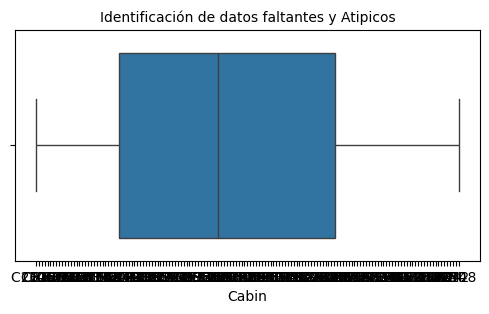

In [367]:
# Identificaciòn de datos Faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Base_datos['Cabin'])
plt.title('Identificación de datos faltantes y Atipicos', fontsize =10)


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [369]:
# Revision de datos faltantes

print("Cantidad de Registros con cero en Survived: ",Base_datos ['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Base_datos ['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Base_datos ['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Base_datos ['Age'].isin([0]).sum())

Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678
Cantidad de Registros con cero en Age:  0


In [375]:
# Revision de datos faltantes

print("Cantidad de Registros con cero en Age: ",Base_datos ['Age'].isin([" "]).sum())



Cantidad de Registros con cero en Age:  0


Text(0.5, 1.0, 'Identificación de datos Atipicos')

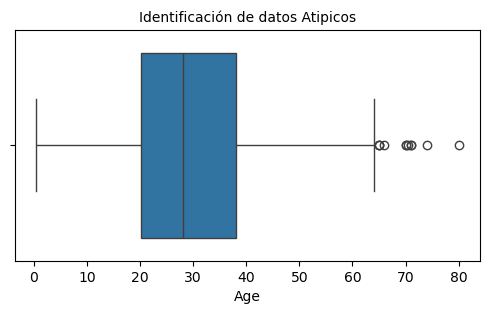

In [377]:
#Identificaciòn de datos atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Base_datos['Age'])
plt.title('Identificación de datos Atipicos', fontsize =10)

In [379]:
# Revisión del tipo de datos y datos faltantes

Base_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [381]:
# Revisión de los datos de las variables objetivo
Base_datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [446]:
# Filtrar columnas del modelo 

Base_datos1 = Base_datos[["PassengerId","Survived","Pclass", "SibSp", "Fare"]]


3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.

In [385]:
# Total de persona con enfermedad cardiaca
Base_datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [146]:
Base_datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo. 

In [448]:
# Porcentaje de datos para entrenamiento (train) = 70% , y para prueba (test) = 30%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Base_datos1.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Base_datos1['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, stratify=Y, random_state= 0)

In [450]:
print(X_train)

     PassengerId  Pclass  SibSp     Fare
836          837       3      0   8.6625
120          121       2      2  73.5000
51            52       3      0   7.8000
158          159       3      0   8.6625
515          516       1      0  34.0208
..           ...     ...    ...      ...
570          571       2      0  10.5000
490          491       3      1  19.9667
368          369       3      0   7.7500
48            49       3      2  21.6792
80            81       3      0   9.0000

[534 rows x 4 columns]


In [452]:
print(Y_train)

836    0
120    0
51     0
158    0
515    0
      ..
570    1
490    0
368    1
48     0
80     0
Name: Survived, Length: 534, dtype: int64


5.  Entrenar el modelo configurando los diferentes 
hiperparámetros. 

In [454]:
# Construir el modelo de regresión logística 

conjunto = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
conjunto.fit (X_train, Y_train)   

# Crea el modelo de prediccion
prueba = conjunto.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [456]:
print (Y_test)

864    0
303    1
258    1
887    1
406    0
      ..
233    1
540    1
130    0
536    0
8      1
Name: Survived, Length: 357, dtype: int64


In [458]:
print(prueba)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc. 

In [460]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,prueba))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       220
           1       0.60      0.38      0.46       137

    accuracy                           0.66       357
   macro avg       0.64      0.61      0.61       357
weighted avg       0.65      0.66      0.64       357



7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 

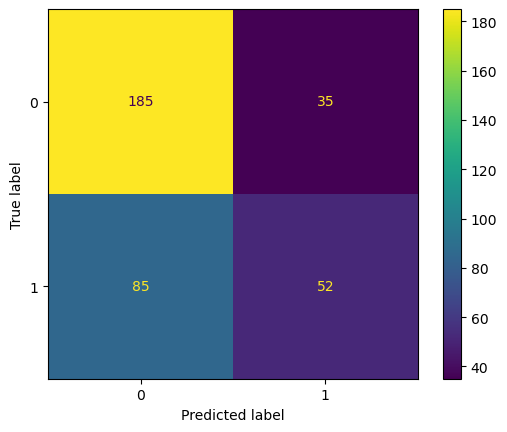

In [462]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,prueba)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

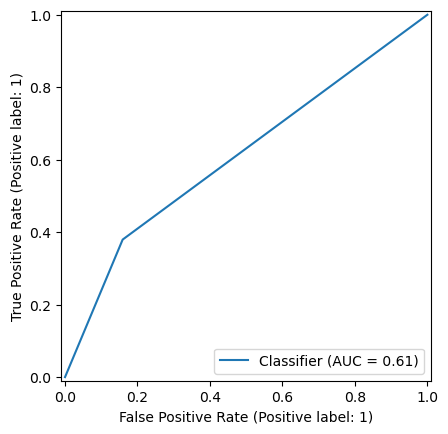

In [464]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prueba)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede detacar:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. La precisión para la clase "Sobreviente" es 0,69, en este sentido hace alusión al 69% de las personas que sobrevueron por el modelo realizado.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Para la clase "Suviver" es 0,84, lo que indica que el modelo identificó correctamente al 84% de todos los que presentan la enfermedad.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "condición" es 0,76, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 185

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 52

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 35

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 85

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,61 lo que significa que el 61 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.